In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy import stats

# OpenWeatherMap API Key
weather_api_key = "8a02f5cd50992d2561fc902ff6f940be"

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from citipy import citipy

In [4]:
cities_list= []
record_number = 0
cloud=[]
country=[]
date=[]
humidity=[]
max_temp=[]
wind_speed=[]
lat=[]
lon= []

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [6]:
output_data_file = "cities.csv"

In [7]:
print(output_data_file)

cities.csv


In [8]:
data = pd.read_csv(output_data_file)
data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [9]:
data_df = pd.DataFrame(data)
data_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [10]:

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

for c in range(len(cities)):
    try:
        spec_url=cities[c]
        query_url = f"{url}appid={weather_api_key}&q={spec_url}&units=imperial"
        weather_response = requests.get(query_url).json()
        cities_list.append(weather_response["name"])
        cloud.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        record_number += 1
        print(f"Processing Record {record_number} | {weather_response['name']}")
    except KeyError:
        print('City not found. Skipping...')
print (cities_list)

Processing Record 1 | Manga
Processing Record 2 | Ambilobe
Processing Record 3 | Busselton
Processing Record 4 | Sakakah
Processing Record 5 | Gold Coast
Processing Record 6 | Huron
Processing Record 7 | Aklavik
City not found. Skipping...
Processing Record 8 | Kapaa
Processing Record 9 | Airai
Processing Record 10 | Dunedin
Processing Record 11 | Normandin
Processing Record 12 | Geraldton
City not found. Skipping...
City not found. Skipping...
Processing Record 13 | Punta Arenas
Processing Record 14 | Annaberg-Buchholz
Processing Record 15 | Severo-Kuril'sk
Processing Record 16 | Carnarvon
Processing Record 17 | Hithadhoo
Processing Record 18 | Tiksi
Processing Record 19 | Ushuaia
Processing Record 20 | Avarua
Processing Record 21 | Huambo
Processing Record 22 | Kimberley
Processing Record 23 | Fairview
Processing Record 24 | Nanortalik
City not found. Skipping...
Processing Record 25 | Lavrentiya
Processing Record 26 | Harindānga
Processing Record 27 | Madison Heights
Processing Reco

Processing Record 225 | Taiyuan
Processing Record 226 | Dingle
Processing Record 227 | Pucallpa
Processing Record 228 | Asău
Processing Record 229 | Lázaro Cárdenas
Processing Record 230 | Bayan
Processing Record 231 | Pangody
Processing Record 232 | Khanbari
City not found. Skipping...
City not found. Skipping...
Processing Record 233 | Merauke
Processing Record 234 | Hualmay
Processing Record 235 | Contai
Processing Record 236 | Maceió
Processing Record 237 | Maricá
Processing Record 238 | Pierre
Processing Record 239 | Cabo San Lucas
Processing Record 240 | Dikson
Processing Record 241 | Tilichiki
Processing Record 242 | Vao
Processing Record 243 | Cururupu
City not found. Skipping...
Processing Record 244 | Pokhara
Processing Record 245 | Port Blair
Processing Record 246 | Gamba
Processing Record 247 | Esim
Processing Record 248 | Zdvinsk
Processing Record 249 | Kathu
Processing Record 250 | Bingöl
Processing Record 251 | Pemangkat
Processing Record 252 | Turbiv
City not found. Ski

Processing Record 449 | Havre-St-Pierre
Processing Record 450 | Brookhaven
Processing Record 451 | Okhotsk
Processing Record 452 | Dalvik
Processing Record 453 | Kumul
Processing Record 454 | Traverse City
Processing Record 455 | Pascagoula
Processing Record 456 | Santiago
Processing Record 457 | Atambua
City not found. Skipping...
City not found. Skipping...
Processing Record 458 | Khovd
City not found. Skipping...
Processing Record 459 | Abhā
Processing Record 460 | Les Cayes
Processing Record 461 | Iranshahr
Processing Record 462 | Santa Rosa
Processing Record 463 | Khanpur
Processing Record 464 | Kargasok
Processing Record 465 | Arman'
Processing Record 466 | Kahului
Processing Record 467 | Owando
City not found. Skipping...
Processing Record 468 | Samsun Province
Processing Record 469 | Vestmanna
City not found. Skipping...
Processing Record 470 | Oranjemund
Processing Record 471 | Mokhsogollokh
Processing Record 472 | Mossamedes
Processing Record 473 | Ucluelet
Processing Record 

In [11]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities_list,
    "lon": lon,
    "lat": lat,
    "wind_speed": wind_speed,
    "max_temp": max_temp,
    "humidity": humidity,
    "date": date,
    "country": country,
    "cloud": cloud
}
weather_data = pd.DataFrame(weather_dict)
weather_data


,city,lon,lat,wind_speed,max_temp,humidity,date,country,cloud
0,Manga,-1.07,11.66,0.85,82.81,25,1584494069,BF,40
1,Ambilobe,49.05,-13.20,2.77,74.75,91,1584494070,MG,47
2,Busselton,115.33,-33.65,1.01,59.00,97,1584493781,AU,20
3,Sakakah,40.21,29.97,17.22,59.00,54,1584494070,SA,0
4,Gold Coast,153.43,-28.00,16.11,80.01,50,1584493930,AU,4
...,...,...,...,...,...,...,...,...,...
556,Lodwar,35.60,3.12,4.72,83.19,55,1584494213,KE,88
557,Andalan,121.39,5.96,3.24,80.73,73,1584494213,PH,93
558,Nanzhang,111.84,31.78,2.48,59.11,60,1584494213,CN,0
559,General Roca,-67.58,-39.03,5.82,69.80,43,1584494213,AR,40


In [53]:
weather_data.to_csv('weather.csv')

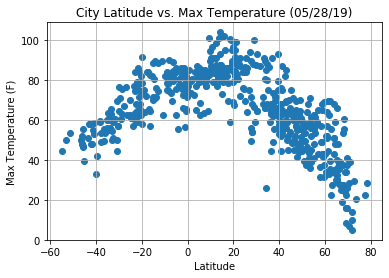

This plot is showing that cities closer to the equator have higher max temperatures. This is using data on 05/28/19 and is just one day of data.


In [54]:
# Build a scatter plot for each data type
plt.scatter(data_df["Lat"], data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

print('This plot is showing that cities closer to the equator have higher max temperatures. This is using data on 05/28/19 and is just one day of data.')

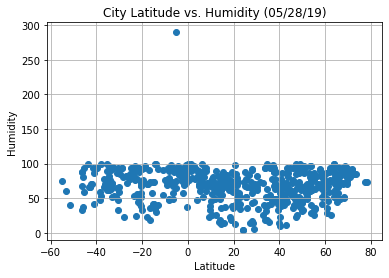

This plot is showing that distance from the equator does not have a large impact on humidity. This is using data on 05/28/19 and is just one day of data.


In [55]:
# Build a scatter plot for each data type
plt.scatter(data_df["Lat"], data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

print('This plot is showing that distance from the equator does not have a large impact on humidity. This is using data on 05/28/19 and is just one day of data.')

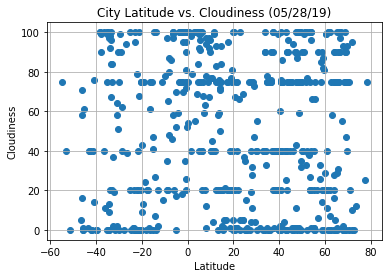

This plot shows that cloudiness is variable across cities and does not have a strong correlation to distance from equator. This is using data on 05/28/19 and is just one day of data.


In [56]:
# Build a scatter plot for each data type
plt.scatter(data_df["Lat"], data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

print('This plot shows that cloudiness is variable across cities and does not have a strong correlation to distance from equator. This is using data on 05/28/19 and is just one day of data.')

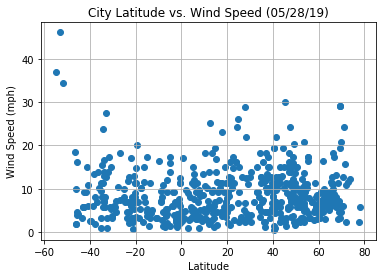

This plot shows that wind speed is variable across cities and does not have a strong correlation to distance from the equator. This is using data on 05/28/19 and is just one day of data.


In [57]:
# Build a scatter plot for each data type
plt.scatter(data_df["Lat"], data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

print('This plot shows that wind speed is variable across cities and does not have a strong correlation to distance from the equator. This is using data on 05/28/19 and is just one day of data.')

In [58]:
weather_data

,city,lon,lat,wind_speed,max_temp,humidity,date,country,cloud
0,Manga,-1.07,11.66,0.85,82.81,25,1584494069,BF,40
1,Ambilobe,49.05,-13.20,2.77,74.75,91,1584494070,MG,47
2,Busselton,115.33,-33.65,1.01,59.00,97,1584493781,AU,20
3,Sakakah,40.21,29.97,17.22,59.00,54,1584494070,SA,0
4,Gold Coast,153.43,-28.00,16.11,80.01,50,1584493930,AU,4
...,...,...,...,...,...,...,...,...,...
556,Lodwar,35.60,3.12,4.72,83.19,55,1584494213,KE,88
557,Andalan,121.39,5.96,3.24,80.73,73,1584494213,PH,93
558,Nanzhang,111.84,31.78,2.48,59.11,60,1584494213,CN,0
559,General Roca,-67.58,-39.03,5.82,69.80,43,1584494213,AR,40


In [59]:
north_weather_data = weather_data[(weather_data.lat >= 0)]
north_weather_data


,city,lon,lat,wind_speed,max_temp,humidity,date,country,cloud
0,Manga,-1.07,11.66,0.85,82.81,25,1584494069,BF,40
3,Sakakah,40.21,29.97,17.22,59.00,54,1584494070,SA,0
5,Huron,-82.55,41.15,6.93,43.00,60,1584494071,US,1
6,Aklavik,-135.01,68.22,4.09,23.00,67,1584493489,CA,40
7,Kapaa,-159.32,22.08,6.93,78.80,94,1584494071,US,75
...,...,...,...,...,...,...,...,...,...
555,Berdigestyakh,126.70,62.10,6.35,-2.45,94,1584494213,RU,99
556,Lodwar,35.60,3.12,4.72,83.19,55,1584494213,KE,88
557,Andalan,121.39,5.96,3.24,80.73,73,1584494213,PH,93
558,Nanzhang,111.84,31.78,2.48,59.11,60,1584494213,CN,0


In [60]:
south_weather_data = weather_data[(weather_data.lat < 0)]
south_weather_data

,city,lon,lat,wind_speed,max_temp,humidity,date,country,cloud
1,Ambilobe,49.05,-13.20,2.77,74.75,91,1584494070,MG,47
2,Busselton,115.33,-33.65,1.01,59.00,97,1584493781,AU,20
4,Gold Coast,153.43,-28.00,16.11,80.01,50,1584493930,AU,4
8,Airai,125.41,-8.93,4.74,73.18,64,1584493506,TL,0
9,Dunedin,170.50,-45.87,5.01,64.99,46,1584493517,NZ,0
...,...,...,...,...,...,...,...,...,...
528,Gladstone,151.25,-23.85,13.87,80.60,51,1584494206,AU,40
544,Trairi,-39.27,-3.28,1.99,74.16,91,1584494210,BR,60
551,Alvarães,-64.80,-3.22,2.06,76.21,96,1584494212,BR,97
554,Port Hedland,118.57,-20.32,9.17,95.00,36,1584494212,AU,0


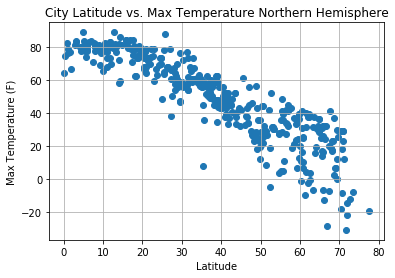

<Figure size 432x288 with 0 Axes>

In [75]:
# Build a scatter plot for each data type
plt.scatter(north_weather_data["lat"], north_weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature Northern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_max_temp.png')

In [77]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_weather_data["lat"], north_weather_data["max_temp"])

# Get regression values
regress_values = north_weather_data["lat"] * slope + intercept
print(regress_values)

0      78.852279
3      57.984305
5      45.242418
6      14.390640
7      66.976567
         ...    
555    21.365626
556    88.585349
557    85.348590
558    55.921441
560    73.586848
Name: lat, Length: 385, dtype: float64


In [78]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.14x +92.14


The r-squared is: -0.8896688317523717


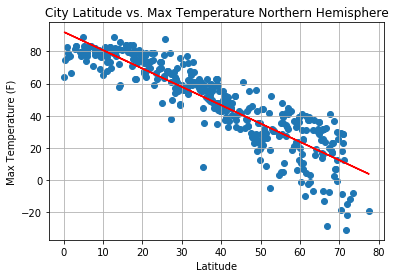

<Figure size 432x288 with 0 Axes>

In [79]:
 # Create Plot
plt.scatter(north_weather_data["lat"], north_weather_data["max_temp"], marker="o")
plt.plot(north_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Max Temperature Northern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_max_temp_reg.png')

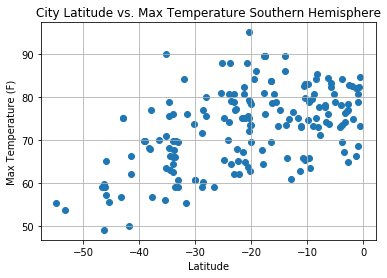

<Figure size 432x288 with 0 Axes>

In [80]:
# Build a scatter plot for each data type
plt.scatter(south_weather_data["lat"], south_weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature Southern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_max_temp_south.png')

In [81]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_weather_data["lat"], south_weather_data["max_temp"])

# Get regression values
regress_values = south_weather_data["lat"] * slope + intercept
print(regress_values)

1      75.548955
2      68.235743
4      70.256264
8      77.075968
9      63.865697
         ...    
528    71.740363
544    79.096489
551    79.117946
554    73.002742
559    66.311779
Name: lat, Length: 176, dtype: float64


In [82]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.36x +80.27


The r-squared is: 0.5198585318339279


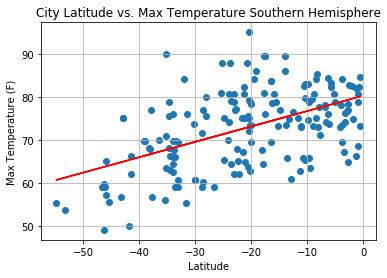

This plot is showing that cities closer to the equator have higher max temperatures. The southern hemisphere has a positive correlation between latitute and max temp, while the northern hemisphere has a negative correlation. In both cases, as you get further away from the equator temperature decreases, the correlation difference is due to the change between a positive or negative number based on northern or southern hemisphere.


<Figure size 432x288 with 0 Axes>

In [83]:
 # Create Plot
plt.scatter(south_weather_data["lat"], south_weather_data["max_temp"], marker="o")
plt.plot(south_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Max Temperature Southern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_max_temp_south_reg.png')

print('This plot is showing that cities closer to the equator have higher max temperatures. The southern hemisphere has a positive correlation between latitute and max temp, while the northern hemisphere has a negative correlation. In both cases, as you get further away from the equator temperature decreases, the correlation difference is due to the change between a positive or negative number based on northern or southern hemisphere.')

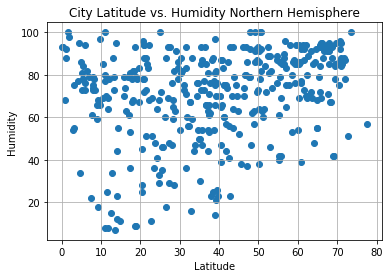

<Figure size 432x288 with 0 Axes>

In [84]:
# Build a scatter plot for each data type
plt.scatter(north_weather_data["lat"], north_weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_humidity_north.png')

In [85]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_weather_data["lat"], north_weather_data["humidity"])

# Get regression values
regress_values = north_weather_data["lat"] * slope + intercept
print(regress_values)

0      63.249223
3      68.171153
5      71.176461
6      78.453176
7      66.050234
         ...    
555    76.808052
556    60.953576
557    61.717000
558    68.657701
560    64.491130
Name: lat, Length: 385, dtype: float64


In [86]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.27x +60.11


The r-squared is: 0.25300117850561127


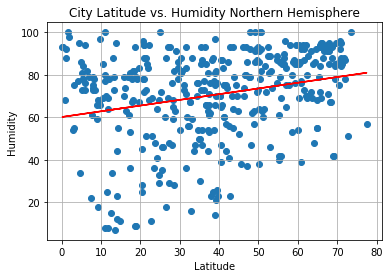

<Figure size 432x288 with 0 Axes>

In [87]:
 # Create Plot
plt.scatter(north_weather_data["lat"], north_weather_data["humidity"], marker="o")
plt.plot(north_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_humidity_north_reg.png')

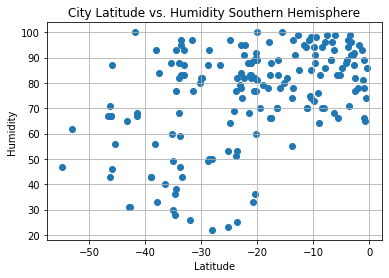

<Figure size 432x288 with 0 Axes>

In [88]:
# Build a scatter plot for each data type
plt.scatter(south_weather_data["lat"], south_weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_humidity_south.png')

In [89]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_weather_data["lat"], south_weather_data["humidity"])

# Get regression values
regress_values = south_weather_data["lat"] * slope + intercept
print(regress_values)

1      80.526099
2      67.029859
4      70.758649
8      83.344140
9      58.965113
         ...    
528    73.497495
544    87.072930
551    87.112528
554    75.827164
559    63.479259
Name: lat, Length: 176, dtype: float64


In [90]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.66x +89.24


The r-squared is: 0.45341868867641066


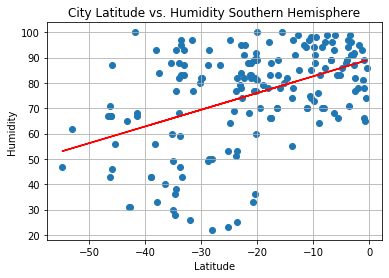

Based on the data collected during this pull of 500+ cities it appears that both hemispheres have positive correlations between latitude and humidity. In the Southern Hemisphere we see as you get closer to the equator it becomes more humid. In the northern hemisphere as you get further from the equator it becomes more humid.


<Figure size 432x288 with 0 Axes>

In [91]:
 # Create Plot
plt.scatter(south_weather_data["lat"], south_weather_data["humidity"], marker="o")
plt.plot(south_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_humidity_south_reg.png')

print("Based on the data collected during this pull of 500+ cities it appears that both hemispheres have positive correlations between latitude and humidity. In the Southern Hemisphere we see as you get closer to the equator it becomes more humid. In the northern hemisphere as you get further from the equator it becomes more humid.")

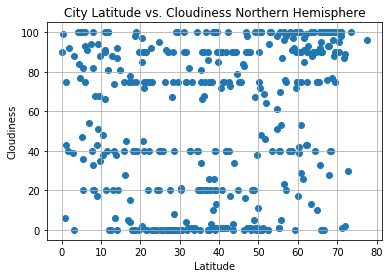

<Figure size 432x288 with 0 Axes>

In [92]:
# Build a scatter plot for each data type
plt.scatter(north_weather_data["lat"], north_weather_data["cloud"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_cloud_north.png')

In [93]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_weather_data["lat"], north_weather_data["cloud"])

# Get regression values
regress_values = north_weather_data["lat"] * slope + intercept
print(regress_values)

0      46.648540
3      52.358218
5      55.844521
6      64.285863
7      49.897849
         ...    
555    62.377440
556    43.985479
557    44.871088
558    52.922637
560    48.089213
Name: lat, Length: 385, dtype: float64


In [94]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.31x +43.01


The r-squared is: 0.16603699630515736


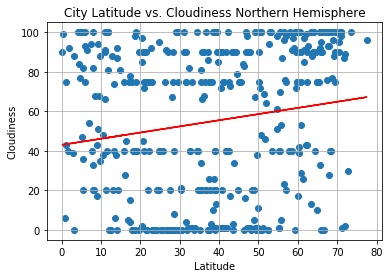

<Figure size 432x288 with 0 Axes>

In [96]:
# Create Plot
plt.scatter(north_weather_data["lat"], north_weather_data["cloud"], marker="o")
plt.plot(north_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_cloud_north_reg.png')

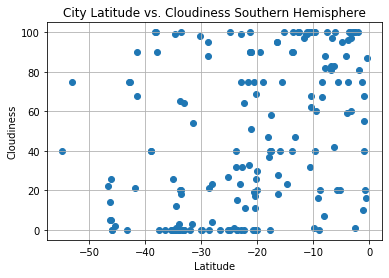

<Figure size 432x288 with 0 Axes>

In [97]:
# Build a scatter plot for each data type
plt.scatter(south_weather_data["lat"], south_weather_data["cloud"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_cloud_south.png')

In [98]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_weather_data["lat"], south_weather_data["cloud"])

# Get regression values
regress_values = south_weather_data["lat"] * slope + intercept
print(regress_values)

1      56.530023
2      33.233698
4      39.670091
8      61.394341
9      19.312862
         ...    
528    44.397707
544    67.830735
551    67.899086
554    48.419029
559    27.104884
Name: lat, Length: 176, dtype: float64


In [99]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 1.14x +71.57


The r-squared is: 0.3917533262023311


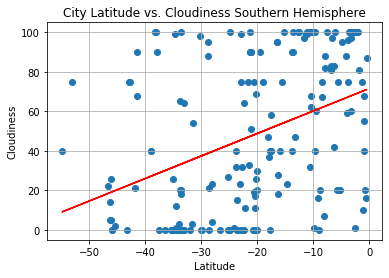

Both hemispheres have positive correlations between latitudes and cloudiness. In the Southern Hemisphere as you get closer to the equator there are more clouds.  In the Northern Hemisphere as you get further from the equator there are more clouds.


<Figure size 432x288 with 0 Axes>

In [100]:
# Create Plot
plt.scatter(south_weather_data["lat"], south_weather_data["cloud"], marker="o")
plt.plot(south_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_cloud_south_reg.png')

print('Both hemispheres have positive correlations between latitudes and cloudiness. In the Southern Hemisphere as you get closer to the equator there are more clouds.  In the Northern Hemisphere as you get further from the equator there are more clouds.')

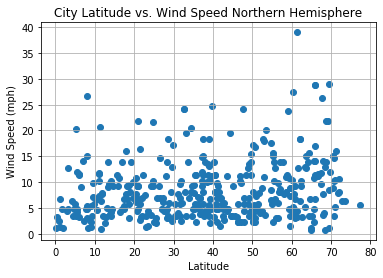

<Figure size 432x288 with 0 Axes>

In [101]:
# Build a scatter plot for each data type
plt.scatter(north_weather_data["lat"], north_weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed Northern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_wind_north.png')

In [102]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_weather_data["lat"], north_weather_data["wind_speed"])

# Get regression values
regress_values = north_weather_data["lat"] * slope + intercept
print(regress_values)

0       6.907513
3       7.977487
5       8.630809
6      10.212689
7       7.516422
         ...    
555     9.855057
556     6.408464
557     6.574424
558     8.083258
560     7.177490
Name: lat, Length: 385, dtype: float64


In [103]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.06x +6.23


The r-squared is: 0.20304736740813956


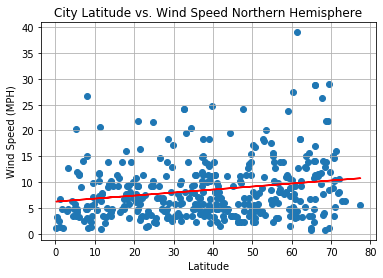

<Figure size 432x288 with 0 Axes>

In [104]:
# Create Plot
plt.scatter(north_weather_data["lat"], north_weather_data["wind_speed"], marker="o")
plt.plot(north_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed Northern Hemisphere")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

plt.savefig('city_lat_wind_north_reg.png')


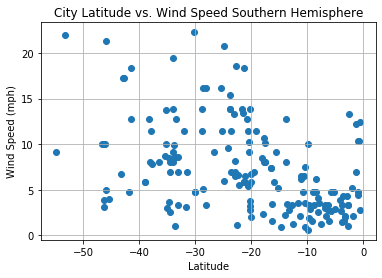

<Figure size 432x288 with 0 Axes>

In [105]:
# Build a scatter plot for each data type
plt.scatter(south_weather_data["lat"], south_weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig('city_lat_wind_south.png')

In [106]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_weather_data["lat"], south_weather_data["wind_speed"])

# Get regression values
regress_values = south_weather_data["lat"] * slope + intercept
print(regress_values)

1       6.084103
2       9.384657
4       8.472768
8       5.394941
9      11.356920
         ...    
528     7.802974
544     4.483052
551     4.473369
554     7.233245
559    10.252969
Name: lat, Length: 176, dtype: float64


In [107]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.16x +3.95


The r-squared is: -0.43891694000385667


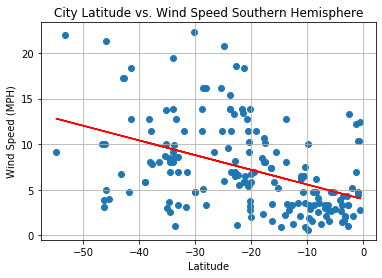

In the Northern Hemisphere as you get further from the equator wind speed picks up, conversly in the Southern Hemisphere as you get closer to the equator the wind speed slows down.


In [51]:
# Create Plot
plt.scatter(south_weather_data["lat"], south_weather_data["wind_speed"], marker="o")
plt.plot(south_weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed Southern Hemisphere")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

print('In the Northern Hemisphere as you get further from the equator wind speed picks up, conversly in the Southern Hemisphere as you get closer to the equator the wind speed slows down.')
